In [1]:
# Exercise 1: classifier for MNIST with 97%+ accuracy
# hint: KNeighbours and GridSearchCV on n_neighbors & weights

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [5]:
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_neighbors": [3, 4, 5],
    "weights": ["uniform", "distance"]
}

knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf, param_grid, return_train_score=True)
grid_search.fit(X_train, y_train)

In [2]:
# Did not run the above in the end as it takes hours, checked against solutions and I was 
# pretty much there but no need to return_train_score as can just use .best_score_ 
# and accuracy_score() on predictions of X_test

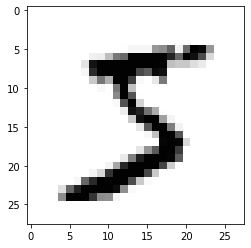

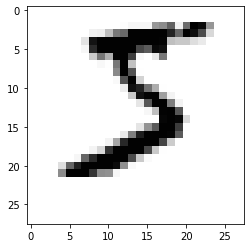

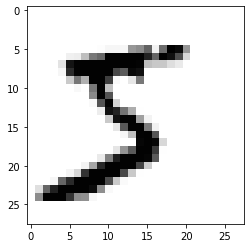

In [21]:
# Exercise 2: Write function to shift image left / right / up / down by 1 px
# for each image in the dataset create 4 new ones, one shifted in each direction

# Training on the new training set will cause 
# even better performance by artificially expanding the training set (not doing this step as lengthy to train)
from scipy.ndimage.interpolation import shift
import matplotlib.pyplot as plt

def shift_image(image, shift_x, shift_y):
    image = image.reshape(28, 28)
    return shift(image, [shift_x, shift_y]).reshape([-1])


plt.imshow(X[0].reshape(28, 28), cmap="Greys")
plt.show()
test = shift_image(X[0], -3, 0)
plt.imshow(test.reshape(28, 28), cmap="Greys")
plt.show()
test_y = shift_image(X[0], 0, -3)
plt.imshow(test_y.reshape(28, 28), cmap="Greys")
plt.show()

X_train_expanded = [image for image in X_train]
y_train_expanded = [label for label in y_train]

for shift_x, shift_y in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_expanded.append(shift_image(image, shift_x, shift_y))
        y_train_expanded.append(label)
# convert back to numpy array and you're good to train with KNeighborsClassifier with .best_params_ from CVSearch